# 다중 입력 로지스틱회귀

GRE 점수, GPA, Prestige를 기반으로 UCLA 대학에 합격할 수 있는지 없는지 여부를 분석

- admit: 이항 변수(binary variable)로 합격(admit = 1), 불합격(admit = 0)으로 나뉨
- gre: GRE(Graduate Record Examination) 점수
- gpa: GPA (Grade Point Average) 학점 평균
- prestige: 출신 고등학교입니다. (prestige = 1이면 가장 좋은 학교이고, prestige = 4이면 가장 안 좋은 학교)

In [ ]:
!pip install statsmodels

In [9]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv('admissions.csv')
df.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   admit     397 non-null    int64  
 1   gre       397 non-null    int64  
 2   gpa       397 non-null    float64
 3   prestige  397 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.5 KB


In [14]:
df[['prest_1','prest_2','prest_3','prest_4']] = pd.get_dummies(df['prestige'])
df.head()

,admit,gre,gpa,prestige,intercept,prest_1,prest_2,prest_31,prest_4,prest_3
0,0,380,3.61,3,1,0,0,1,0,1
1,1,660,3.67,3,1,0,0,1,0,1
2,1,800,4.00,1,1,1,0,0,0,0
3,1,640,3.19,4,1,0,0,0,1,0
4,0,520,2.93,4,1,0,0,0,1,0


In [15]:
df['intercept'] = 1

logit_mod = sm.Logit(df['admit'],df[['intercept','gre','gpa','prest_2','prest_3','prest_4']])

results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Mon, 08 Mar 2021   Pseudo R-squ.:                 0.08166
Time:                        19:34:32   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
Covariance Type:            nonrobust   LLR p-value:                 1.176e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -3.8769      1.142     -3.393      0.001      -6.116      -1.638
gre            0.0022      0.001      2.028      0.043    7.44e-05       0.004
gpa            0.7793      0.333      2.344      0.019       0.128       1.431
prest_2       -0.6801      0.317     -2.146      0.032      -1.301      -0.059
prest_3       -1.3387      0.345     -3.882      0.000      -2.015      -0.663
prest_4       -1.5534      0.417     -3.721      0.000      -2.372      -0.735
==============================================================================
"""

# 실습 : 성적 분석

| 중간고사(x1) | 기말고사(x2) | 추가점수(x3) | 성적(y) |
|-|-|-|-|
| 70 | 85 | 11 | 73 |
| 71 | 89 | 18 | 82 |
| 50 | 80 | 20 | 72 |
| 99 | 20 | 10 | 57 |
| 50 | 10 | 10 | 34 |
| 20 | 99 | 10 | 58 |
| 40 | 50 | 20 | 56 |

# H(x) = w1x1 + w2x2 + w3x3 + b

5개의 데이터는 학습용으로, 2개는 테스트 데이터로 분리

In [17]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [18]:
# 입력 데이터는 3차원이고, 출력은 1차원이다.

X = np.array([[70,85,18],[71,89,18],[50,80,20],[99,20,10],[50,10,10]])

y = np.array([73,82,72,57,34])

In [19]:
model = Sequential()
model.add(Dense(1, input_dim=3, activation='linear'))

In [21]:
# 학습률을 지정(learning rate)

sgd = optimizers.SGD(lr=0.00001)

In [23]:
# mse : 평균제곱오차법, sdg : 경사하강법
model.compile(optimizer=sgd, loss = 'mse', metrics = ['mse'])

In [24]:
# batch_size : 작업진행표시안함 -> 0, 표시 -> 1, 
model.fit(X, y, batch_size = 1, epochs = 2000, shuffle=False)

Epoch 1/2000
5/5 [==============================] - 1s 6ms/step - loss: 6312.8227 - mse: 6312.8227
Epoch 2/2000
5/5 [==============================] - 0s 2ms/step - loss: 753.3040 - mse: 753.3040
Epoch 3/2000
5/5 [==============================] - 0s 2ms/step - loss: 86.5287 - mse: 86.5287
Epoch 4/2000
5/5 [==============================] - 0s 1ms/step - loss: 28.4648 - mse: 28.4648
Epoch 5/2000
5/5 [==============================] - 0s 997us/step - loss: 30.1985 - mse: 30.1985
Epoch 6/2000
5/5 [==============================] - 0s 1ms/step - loss: 31.9018 - mse: 31.9018
Epoch 7/2000
5/5 [==============================] - 0s 998us/step - loss: 30.9944 - mse: 30.9944
Epoch 8/2000
5/5 [==============================] - 0s 1ms/step - loss: 29.0782 - mse: 29.0782
Epoch 9/2000
5/5 [==============================] - 0s 997us/step - loss: 27.0192 - mse: 27.0192
Epoch 10/2000
5/5 [==============================] - 0s 997us/step - loss: 25.1260 - mse: 25.1260
Epoch 11/2000
5/5 [================

5/5 [==============================] - 0s 997us/step - loss: 13.6129 - mse: 13.6129
Epoch 169/2000
5/5 [==============================] - 0s 1ms/step - loss: 13.6128 - mse: 13.6128
Epoch 170/2000
5/5 [==============================] - 0s 1ms/step - loss: 13.6127 - mse: 13.6127
Epoch 171/2000
5/5 [==============================] - 0s 1ms/step - loss: 13.6126 - mse: 13.6126
Epoch 172/2000
5/5 [==============================] - 0s 1ms/step - loss: 13.6126 - mse: 13.6126
Epoch 173/2000
5/5 [==============================] - 0s 997us/step - loss: 13.6125 - mse: 13.6125
Epoch 174/2000
5/5 [==============================] - 0s 748us/step - loss: 13.6124 - mse: 13.6124
Epoch 175/2000
5/5 [==============================] - 0s 997us/step - loss: 13.6123 - mse: 13.6123
Epoch 176/2000
5/5 [==============================] - 0s 748us/step - loss: 13.6122 - mse: 13.6122
Epoch 177/2000
5/5 [==============================] - 0s 1ms/step - loss: 13.6122 - mse: 13.6122
Epoch 178/2000
5/5 [===============

5/5 [==============================] - 0s 1ms/step - loss: 13.6005 - mse: 13.6005
Epoch 334/2000
5/5 [==============================] - 0s 997us/step - loss: 13.6005 - mse: 13.6005
Epoch 335/2000
5/5 [==============================] - 0s 748us/step - loss: 13.6004 - mse: 13.6004
Epoch 336/2000
5/5 [==============================] - 0s 997us/step - loss: 13.6003 - mse: 13.6003
Epoch 337/2000
5/5 [==============================] - 0s 748us/step - loss: 13.6002 - mse: 13.6002
Epoch 338/2000
5/5 [==============================] - 0s 997us/step - loss: 13.6002 - mse: 13.6002
Epoch 339/2000
5/5 [==============================] - 0s 748us/step - loss: 13.6001 - mse: 13.6001
Epoch 340/2000
5/5 [==============================] - 0s 748us/step - loss: 13.6001 - mse: 13.6001
Epoch 341/2000
5/5 [==============================] - 0s 1ms/step - loss: 13.5999 - mse: 13.5999
Epoch 342/2000
5/5 [==============================] - 0s 748us/step - loss: 13.5999 - mse: 13.5999
Epoch 343/2000
5/5 [=========

5/5 [==============================] - 0s 748us/step - loss: 13.5949 - mse: 13.5949
Epoch 417/2000
5/5 [==============================] - 0s 1ms/step - loss: 13.5948 - mse: 13.5948
Epoch 418/2000
5/5 [==============================] - 0s 748us/step - loss: 13.5947 - mse: 13.5947
Epoch 419/2000
5/5 [==============================] - 0s 748us/step - loss: 13.5947 - mse: 13.5947
Epoch 420/2000
5/5 [==============================] - 0s 998us/step - loss: 13.5946 - mse: 13.5946
Epoch 421/2000
5/5 [==============================] - 0s 997us/step - loss: 13.5945 - mse: 13.5945
Epoch 422/2000
5/5 [==============================] - 0s 748us/step - loss: 13.5945 - mse: 13.5945
Epoch 423/2000
5/5 [==============================] - 0s 1ms/step - loss: 13.5944 - mse: 13.5944
Epoch 424/2000
5/5 [==============================] - 0s 997us/step - loss: 13.5943 - mse: 13.5943
Epoch 425/2000
5/5 [==============================] - 0s 1ms/step - loss: 13.5943 - mse: 13.5943
Epoch 426/2000
5/5 [===========

5/5 [==============================] - 0s 748us/step - loss: 13.5896 - mse: 13.5896
Epoch 500/2000
5/5 [==============================] - 0s 748us/step - loss: 13.5895 - mse: 13.5895
Epoch 501/2000
5/5 [==============================] - 0s 997us/step - loss: 13.5895 - mse: 13.5895
Epoch 502/2000
5/5 [==============================] - 0s 997us/step - loss: 13.5894 - mse: 13.5894
Epoch 503/2000
5/5 [==============================] - 0s 748us/step - loss: 13.5893 - mse: 13.5893
Epoch 504/2000
5/5 [==============================] - 0s 997us/step - loss: 13.5893 - mse: 13.5893
Epoch 505/2000
5/5 [==============================] - 0s 499us/step - loss: 13.5892 - mse: 13.5892
Epoch 506/2000
5/5 [==============================] - 0s 1ms/step - loss: 13.5892 - mse: 13.5892
Epoch 507/2000
5/5 [==============================] - 0s 997us/step - loss: 13.5891 - mse: 13.5891
Epoch 508/2000
5/5 [==============================] - 0s 748us/step - loss: 13.5890 - mse: 13.5890
Epoch 509/2000
5/5 [=======

5/5 [==============================] - 0s 997us/step - loss: 13.5846 - mse: 13.5846
Epoch 583/2000
5/5 [==============================] - 0s 997us/step - loss: 13.5846 - mse: 13.5846
Epoch 584/2000
5/5 [==============================] - 0s 748us/step - loss: 13.5845 - mse: 13.5845
Epoch 585/2000
5/5 [==============================] - 0s 997us/step - loss: 13.5845 - mse: 13.5845
Epoch 586/2000
5/5 [==============================] - 0s 748us/step - loss: 13.5844 - mse: 13.5844
Epoch 587/2000
5/5 [==============================] - 0s 1ms/step - loss: 13.5843 - mse: 13.5843
Epoch 588/2000
5/5 [==============================] - 0s 748us/step - loss: 13.5843 - mse: 13.5843
Epoch 589/2000
5/5 [==============================] - 0s 748us/step - loss: 13.5842 - mse: 13.5842
Epoch 590/2000
5/5 [==============================] - 0s 997us/step - loss: 13.5842 - mse: 13.5842
Epoch 591/2000
5/5 [==============================] - 0s 748us/step - loss: 13.5841 - mse: 13.5841
Epoch 592/2000
5/5 [=======

5/5 [==============================] - 0s 1ms/step - loss: 13.5756 - mse: 13.5756
Epoch 749/2000
5/5 [==============================] - 0s 997us/step - loss: 13.5756 - mse: 13.5756
Epoch 750/2000
5/5 [==============================] - 0s 746us/step - loss: 13.5755 - mse: 13.5755
Epoch 751/2000
5/5 [==============================] - 0s 997us/step - loss: 13.5755 - mse: 13.5755
Epoch 752/2000
5/5 [==============================] - 0s 748us/step - loss: 13.5754 - mse: 13.5754
Epoch 753/2000
5/5 [==============================] - 0s 1ms/step - loss: 13.5754 - mse: 13.5754
Epoch 754/2000
5/5 [==============================] - 0s 998us/step - loss: 13.5753 - mse: 13.5753
Epoch 755/2000
5/5 [==============================] - 0s 748us/step - loss: 13.5753 - mse: 13.5753
Epoch 756/2000
5/5 [==============================] - 0s 998us/step - loss: 13.5752 - mse: 13.5752
Epoch 757/2000
5/5 [==============================] - 0s 748us/step - loss: 13.5752 - mse: 13.5752
Epoch 758/2000
5/5 [=========

5/5 [==============================] - 0s 751us/step - loss: 13.5677 - mse: 13.5677
Epoch 915/2000
5/5 [==============================] - 0s 997us/step - loss: 13.5677 - mse: 13.5677
Epoch 916/2000
5/5 [==============================] - 0s 1ms/step - loss: 13.5676 - mse: 13.5676
Epoch 917/2000
5/5 [==============================] - 0s 1ms/step - loss: 13.5676 - mse: 13.5676
Epoch 918/2000
5/5 [==============================] - 0s 748us/step - loss: 13.5675 - mse: 13.5675
Epoch 919/2000
5/5 [==============================] - 0s 1ms/step - loss: 13.5675 - mse: 13.5675
Epoch 920/2000
5/5 [==============================] - 0s 997us/step - loss: 13.5674 - mse: 13.5674
Epoch 921/2000
5/5 [==============================] - 0s 1ms/step - loss: 13.5674 - mse: 13.5674
Epoch 922/2000
5/5 [==============================] - 0s 747us/step - loss: 13.5673 - mse: 13.5673
Epoch 923/2000
5/5 [==============================] - 0s 998us/step - loss: 13.5673 - mse: 13.5673
Epoch 924/2000
5/5 [=============

5/5 [==============================] - 0s 748us/step - loss: 13.5608 - mse: 13.5608
Epoch 1080/2000
5/5 [==============================] - 0s 997us/step - loss: 13.5608 - mse: 13.5608
Epoch 1081/2000
5/5 [==============================] - 0s 748us/step - loss: 13.5607 - mse: 13.5607
Epoch 1082/2000
5/5 [==============================] - 0s 748us/step - loss: 13.5606 - mse: 13.5606
Epoch 1083/2000
5/5 [==============================] - 0s 997us/step - loss: 13.5606 - mse: 13.5606
Epoch 1084/2000
5/5 [==============================] - 0s 748us/step - loss: 13.5606 - mse: 13.5606
Epoch 1085/2000
5/5 [==============================] - 0s 748us/step - loss: 13.5606 - mse: 13.5606
Epoch 1086/2000
5/5 [==============================] - 0s 997us/step - loss: 13.5605 - mse: 13.5605
Epoch 1087/2000
5/5 [==============================] - 0s 748us/step - loss: 13.5605 - mse: 13.5605
Epoch 1088/2000
5/5 [==============================] - 0s 748us/step - loss: 13.5604 - mse: 13.5604
Epoch 1089/2000


5/5 [==============================] - 0s 997us/step - loss: 13.5577 - mse: 13.5577
Epoch 1162/2000
5/5 [==============================] - 0s 748us/step - loss: 13.5576 - mse: 13.5576
Epoch 1163/2000
5/5 [==============================] - 0s 748us/step - loss: 13.5576 - mse: 13.5576
Epoch 1164/2000
5/5 [==============================] - 0s 997us/step - loss: 13.5576 - mse: 13.5576
Epoch 1165/2000
5/5 [==============================] - 0s 748us/step - loss: 13.5575 - mse: 13.5575
Epoch 1166/2000
5/5 [==============================] - 0s 997us/step - loss: 13.5575 - mse: 13.5575
Epoch 1167/2000
5/5 [==============================] - 0s 997us/step - loss: 13.5574 - mse: 13.5574
Epoch 1168/2000
5/5 [==============================] - 0s 997us/step - loss: 13.5574 - mse: 13.5574
Epoch 1169/2000
5/5 [==============================] - 0s 748us/step - loss: 13.5573 - mse: 13.5573
Epoch 1170/2000
5/5 [==============================] - 0s 748us/step - loss: 13.5573 - mse: 13.5573
Epoch 1171/2000


5/5 [==============================] - 0s 1ms/step - loss: 13.5520 - mse: 13.5520
Epoch 1326/2000
5/5 [==============================] - 0s 1ms/step - loss: 13.5519 - mse: 13.5519
Epoch 1327/2000
5/5 [==============================] - 0s 748us/step - loss: 13.5519 - mse: 13.5519
Epoch 1328/2000
5/5 [==============================] - 0s 748us/step - loss: 13.5519 - mse: 13.5519
Epoch 1329/2000
5/5 [==============================] - 0s 997us/step - loss: 13.5518 - mse: 13.5518
Epoch 1330/2000
5/5 [==============================] - 0s 748us/step - loss: 13.5518 - mse: 13.5518
Epoch 1331/2000
5/5 [==============================] - 0s 998us/step - loss: 13.5517 - mse: 13.5517
Epoch 1332/2000
5/5 [==============================] - 0s 997us/step - loss: 13.5517 - mse: 13.5517
Epoch 1333/2000
5/5 [==============================] - 0s 998us/step - loss: 13.5517 - mse: 13.5517
Epoch 1334/2000
5/5 [==============================] - 0s 997us/step - loss: 13.5516 - mse: 13.5516
Epoch 1335/2000
5/5 

5/5 [==============================] - 0s 1ms/step - loss: 13.5469 - mse: 13.5469
Epoch 1490/2000
5/5 [==============================] - 0s 1ms/step - loss: 13.5469 - mse: 13.5469
Epoch 1491/2000
5/5 [==============================] - 0s 1ms/step - loss: 13.5469 - mse: 13.5469
Epoch 1492/2000
5/5 [==============================] - 0s 748us/step - loss: 13.5469 - mse: 13.5469
Epoch 1493/2000
5/5 [==============================] - 0s 997us/step - loss: 13.5468 - mse: 13.5468
Epoch 1494/2000
5/5 [==============================] - 0s 748us/step - loss: 13.5468 - mse: 13.5468
Epoch 1495/2000
5/5 [==============================] - 0s 1ms/step - loss: 13.5468 - mse: 13.5468
Epoch 1496/2000
5/5 [==============================] - 0s 748us/step - loss: 13.5467 - mse: 13.5467
Epoch 1497/2000
5/5 [==============================] - 0s 997us/step - loss: 13.5467 - mse: 13.5467
Epoch 1498/2000
5/5 [==============================] - 0s 997us/step - loss: 13.5466 - mse: 13.5466
Epoch 1499/2000
5/5 [===

5/5 [==============================] - 0s 1ms/step - loss: 13.5425 - mse: 13.5425
Epoch 1654/2000
5/5 [==============================] - 0s 1ms/step - loss: 13.5425 - mse: 13.5425
Epoch 1655/2000
5/5 [==============================] - 0s 997us/step - loss: 13.5424 - mse: 13.5424
Epoch 1656/2000
5/5 [==============================] - 0s 748us/step - loss: 13.5424 - mse: 13.5424
Epoch 1657/2000
5/5 [==============================] - 0s 748us/step - loss: 13.5424 - mse: 13.5424
Epoch 1658/2000
5/5 [==============================] - 0s 1ms/step - loss: 13.5424 - mse: 13.5424
Epoch 1659/2000
5/5 [==============================] - 0s 748us/step - loss: 13.5423 - mse: 13.5423
Epoch 1660/2000
5/5 [==============================] - 0s 1ms/step - loss: 13.5423 - mse: 13.5423
Epoch 1661/2000
5/5 [==============================] - 0s 748us/step - loss: 13.5423 - mse: 13.5423
Epoch 1662/2000
5/5 [==============================] - 0s 748us/step - loss: 13.5423 - mse: 13.5423
Epoch 1663/2000
5/5 [===

5/5 [==============================] - 0s 997us/step - loss: 13.5386 - mse: 13.5386
Epoch 1818/2000
5/5 [==============================] - 0s 745us/step - loss: 13.5386 - mse: 13.5386
Epoch 1819/2000
5/5 [==============================] - 0s 997us/step - loss: 13.5385 - mse: 13.5385
Epoch 1820/2000
5/5 [==============================] - 0s 997us/step - loss: 13.5385 - mse: 13.5385
Epoch 1821/2000
5/5 [==============================] - 0s 1ms/step - loss: 13.5384 - mse: 13.5384
Epoch 1822/2000
5/5 [==============================] - 0s 998us/step - loss: 13.5385 - mse: 13.5385
Epoch 1823/2000
5/5 [==============================] - 0s 1ms/step - loss: 13.5384 - mse: 13.5384
Epoch 1824/2000
5/5 [==============================] - 0s 499us/step - loss: 13.5384 - mse: 13.5384
Epoch 1825/2000
5/5 [==============================] - 0s 748us/step - loss: 13.5384 - mse: 13.5384
Epoch 1826/2000
5/5 [==============================] - 0s 997us/step - loss: 13.5384 - mse: 13.5384
Epoch 1827/2000
5/5 

5/5 [==============================] - 0s 1ms/step - loss: 13.5351 - mse: 13.5351
Epoch 1982/2000
5/5 [==============================] - 0s 1ms/step - loss: 13.5351 - mse: 13.5351
Epoch 1983/2000
5/5 [==============================] - 0s 997us/step - loss: 13.5350 - mse: 13.5350
Epoch 1984/2000
5/5 [==============================] - 0s 748us/step - loss: 13.5351 - mse: 13.5351
Epoch 1985/2000
5/5 [==============================] - 0s 1ms/step - loss: 13.5350 - mse: 13.5350
Epoch 1986/2000
5/5 [==============================] - 0s 999us/step - loss: 13.5350 - mse: 13.5350
Epoch 1987/2000
5/5 [==============================] - 0s 997us/step - loss: 13.5350 - mse: 13.5350
Epoch 1988/2000
5/5 [==============================] - 0s 997us/step - loss: 13.5349 - mse: 13.5349
Epoch 1989/2000
5/5 [==============================] - 0s 997us/step - loss: 13.5349 - mse: 13.5349
Epoch 1990/2000
5/5 [==============================] - 0s 997us/step - loss: 13.5349 - mse: 13.5349
Epoch 1991/2000
5/5 [=

In [25]:
# 예측

model.predict(X)

array([[77.94646 ],
       [79.72603 ],
       [71.04671 ],
       [56.48609 ],
       [34.463387]], dtype=float32)

In [27]:
# 58, 56 점수 예측

X_test = np.array([[20,99,10],[40,50,20]])

model.predict(X_test)

array([[54.312004],
       [56.755085]], dtype=float32)

# --------------------------------------------------------------

# 소프트맥스 : 다중분류 로지스틱회귀 모델

로지스틱은 '예' / '아니오' 를 분류한다.
로지스틱회귀를 여러개 붙여서 정규화된 출력을 하여 여러개의 값으로 분류할 수 있게 만든것을 소트프맥스라 한다.

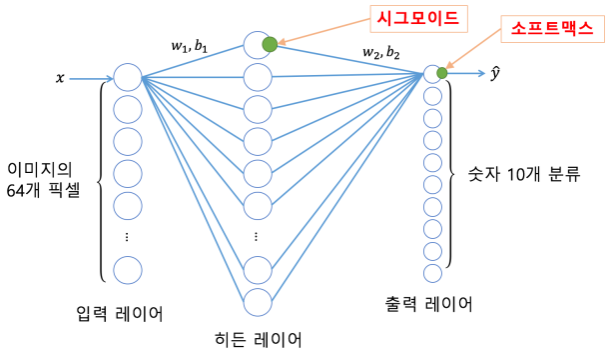

# 실습 : minist 데이터를  사용하여 0 ~ 9 까지 숫자를분류한다.

In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [29]:
from tensorflow.keras import datasets

In [30]:
mnist = datasets.mnist

(train_x, train_y), (test_x, test_y) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [31]:
train_x.shape

(60000, 28, 28)

In [33]:
test_x.shape

(10000, 28, 28)

In [34]:
image = train_x[0]
image.shape

(28, 28)

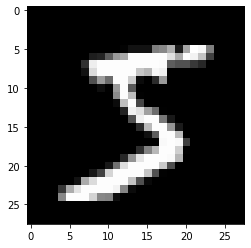

In [36]:
# gray' 옵션을 사용하면 흑백으로 출력됨

#plt.imshow(image)
plt.imshow(image, 'gray')
plt.show()

In [37]:
# 차원 수늘리기 (-1 값은 맨뒤의 차원늘리기, 0 값은 맨앞의 차원을 늘린다)
nptrain_x = np.expand_dims(train_x, -1)

new_train_x = tf.expand_dims(train_x, -1)
new_train_x.shape

TensorShape([60000, 28, 28, 1])

In [46]:
# 첫번째 이미지에 대한 정답 확인

train_y[2]

4

#### 케라스에서 원핫인코딩

In [55]:
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

In [56]:
# 10개 중에서 첫번째 인덱스를 1로 주고, 나머지는 0으로 지정한다.

to_categorical(0, 10)

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [57]:
label = train_y[2]
label_onehot = to_categorical(label, num_classes = 10)
label_onehot

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

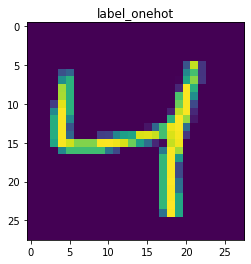

In [59]:
plt.title('label_onehot')
plt.imshow(train_x[2])
plt.show()

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print('train data (count, row, column) : ', str(X_train.shape))

train data (count, row, column) :  (60000, 28, 28)


In [4]:
print('test data (count, row, column) : ', str(X_test.shape))

test data (count, row, column) :  (10000, 28, 28)


In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

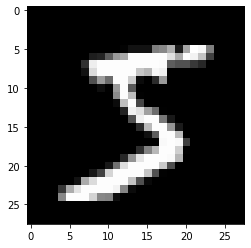

In [8]:
image = X_train[0]
image.shape

plt.imshow(image, 'gray')
plt.show()

In [9]:
# 정규화

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
input_dim = 784    # 28 * 28

In [12]:
X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


### 소프트맥스로 어떻게 10개의 숫자를 구분할 것인가?

정규화(0.0 ~ 1)된 여러개의 로지스틱회귀로 구성되며,

만약, mnist 분석을 하는 경우 10개의 로지스틱회귀를 배열로 나타낸다.

--> [ㅣ0, ㅣ1, ㅣ2, ㅣ3, ㅣ4, ㅣ5, ㅣ6, ㅣ7, ㅣ8 ,ㅣ9]

--> [1,0,0,0,0,0,0,0,0,0] => 숫자0을 의미한다.

In [14]:
num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [17]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

케라스의 Sequential()을 사용하여 소프트맥스를 구현할 수 있다.

총 784개의 (28 * 28) 입력을 받아서 10개의 시그모이드 값을 출력하는 모델 구현

In [18]:
model = Sequential()

model.add(Dense(input_dim=input_dim, units=10, activation='softmax'))

#### 모델학습

10개의 클래스로 분류할 것이기 때문에 categorical_crossentropy를 비용함수로 사용하는 경사하강법으로 최적의 w값과 b값을 학습한다.

In [19]:
model.compile(optimizer='sgd', 
              loss = 'categorical_crossentropy', # 분류값 > 3
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=2048, epochs=100, verbose=0)

In [24]:
# 정확도 

score = model.evaluate(X_test, y_test)

score[1]

313/313 [==============================] - 0s 604us/step - loss: 0.4230 - accuracy: 0.8905


0.890500009059906

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [27]:
# w, b값 확인

model.layers[0].weights

[<tf.Variable 'dense/kernel:0' shape=(784, 10) dtype=float32, numpy=
 array([[-0.06358896,  0.02928197, -0.00170347, ..., -0.01408115,
         -0.06101753,  0.0054465 ],
        [ 0.03874885,  0.04014937,  0.06107395, ..., -0.08651848,
          0.01305235,  0.08066448],
        [-0.05308778, -0.03754722, -0.04243219, ..., -0.07388617,
          0.02315523, -0.05860215],
        ...,
        [ 0.00871554,  0.04754002,  0.04917339, ..., -0.00396369,
         -0.07198338,  0.0356017 ],
        [-0.04603354, -0.02664243,  0.03537046, ..., -0.00286646,
          0.06424006,  0.0396908 ],
        [-0.04003   , -0.0163851 ,  0.05241666, ...,  0.04735962,
          0.06646854, -0.08448327]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=
 array([-0.08484185,  0.16087262, -0.03848876, -0.0605515 ,  0.04444389,
         0.16182972, -0.01311859,  0.1010196 , -0.24092874, -0.03023615],
       dtype=float32)>]

# ---------------------------------------------------------------------------------------------

# 주성분 분석(Principal component Analysis)

**고차원의 데이터를 저차원의 데이터로 축소하는 알고리즘이다.**

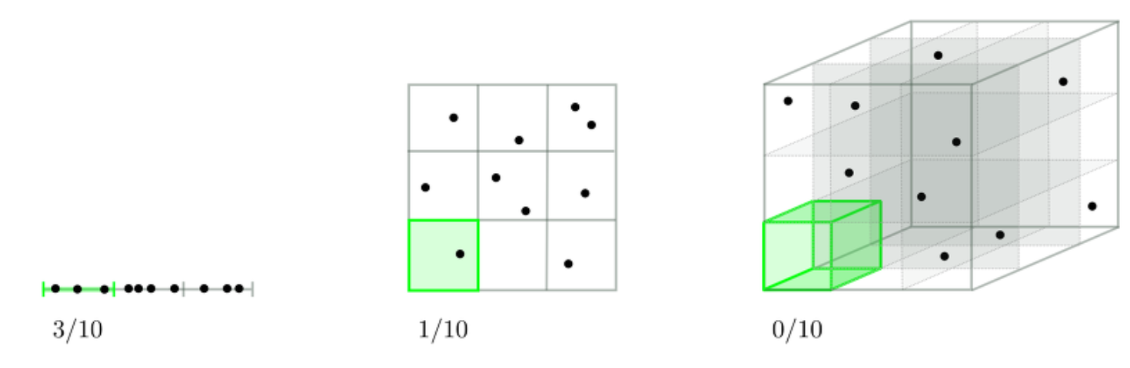

# 실습 : 식생활 분석

In [28]:
import pandas as pd

In [30]:
df = pd.DataFrame(columns=['calory','breakfast','lunch','dinner','exercise','body_shape'])

In [33]:
# 10명 분의 데이터 작성
# 칼로리, 아침, 점심, 저녁, 운동, 체형

df.loc[0] = [1200,1,0,0,2, 'skinny'] # 마른체형
df.loc[1] = [2800,1,1,1,1, 'normal'] # 보통체형
df.loc[2] = [3500,2,2,1,0, 'fat'] # 비만
df.loc[3] = [1400,0,1,0,3, 'skinny']
df.loc[4] = [5000,2,2,2,0, 'fat']
df.loc[5] = [1300,0,0,1,2, 'skinny']
df.loc[6] = [3000,1,0,1,1, 'normal']
df.loc[7] = [4000,2,2,2,0, 'fat']
df.loc[8] = [2600,0,2,0,0, 'normal']
df.loc[9] = [3000,1,1,1,1, 'fat']

In [34]:
df

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,skinny
1,2800,1,1,1,1,normal
2,3500,2,2,1,0,fat
3,1400,0,1,0,3,skinny
4,5000,2,2,2,0,fat
5,1300,0,0,1,2,skinny
6,3000,1,0,1,1,normal
7,4000,2,2,2,0,fat
8,2600,0,2,0,0,normal
9,3000,1,1,1,1,fat


In [35]:
X = df[['calory', 'breakfast', 'lunch', 'dinner', 'exercise']]

In [36]:
X.shape

(10, 5)

In [39]:
y = df[['body_shape']]

In [40]:
y.shape

(10, 1)

#### 표준화

모든 특성들을 평균이 0이고, 표준편차가 1인 데이터로 변경하여 비교하면 특성들의 상관관계를 이해하기 쉽고, 효율적인 데이터의 특성을 학습시킬 수 있다.

In [41]:
from sklearn.preprocessing import StandardScaler

x_std = StandardScaler().fit_transform(X)

In [44]:
x_std

array([[-1.35205803,  0.        , -1.32424438, -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.12038585,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  1.08347268,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.12038585, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  1.08347268,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.32424438,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.32424438,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  1.08347268,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  1.08347268, -1.28571429, -1.        ],
       [ 0.18826125,  0.        , -0.12038585,  0.14285714,  0.        ]])

#### 공분산행렬 구하기

공분산은 2개의 특성(또는 변수) 간의 상관관계 정도를 표현한 값이다.

일종의 행렬로써, 데이터의 구조를 설명해주고, 특징들의 행동이 얼마나 닮았는가를 행렬에 표현한다.

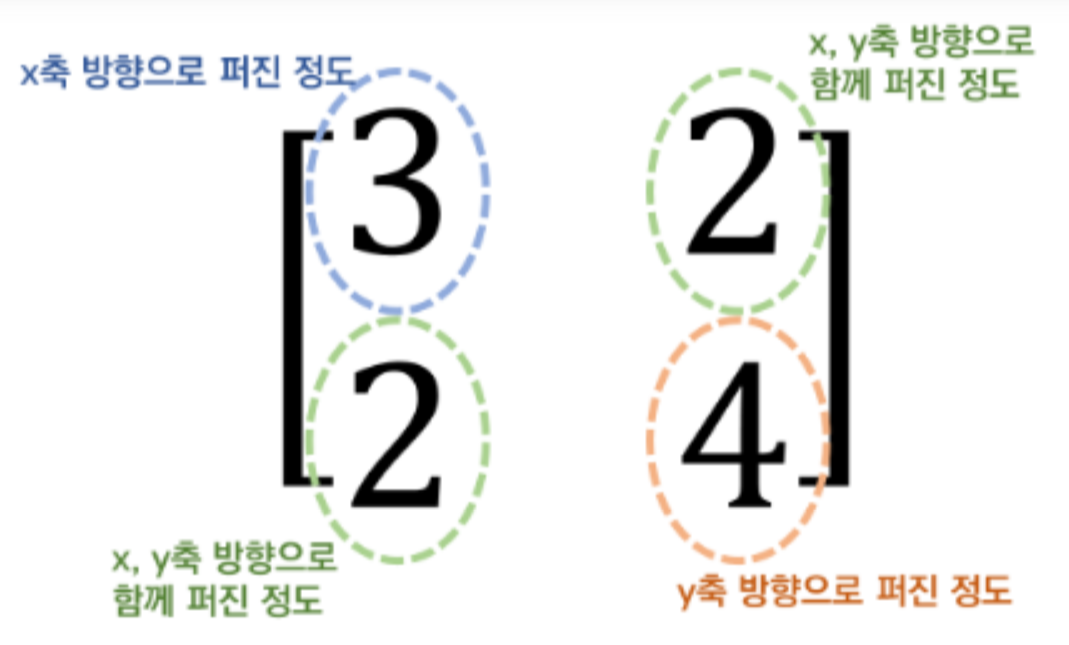

In [45]:
import numpy as np

In [46]:
features = x_std.T

covarance_metrix = np.cov(features)

covarance_metrix

array([[ 1.11111111,  0.88379717,  0.78064857,  0.89376551, -0.93179808],
       [ 0.88379717,  1.11111111,  0.51805823,  0.81967902, -0.71721914],
       [ 0.78064857,  0.51805823,  1.11111111,  0.40128618, -0.80257235],
       [ 0.89376551,  0.81967902,  0.40128618,  1.11111111, -0.63492063],
       [-0.93179808, -0.71721914, -0.80257235, -0.63492063,  1.11111111]])

### 고유값과 고유벡터 구하기 -> 1차원 공간으로 축소하겠다는 의미

- 벡터 : 1차원을 뜻함
- 매트릭스 : 2차원 이상을 뜻함

공분산 행렬에서의 고유값 eigan value, 고유벡터 eigan vector

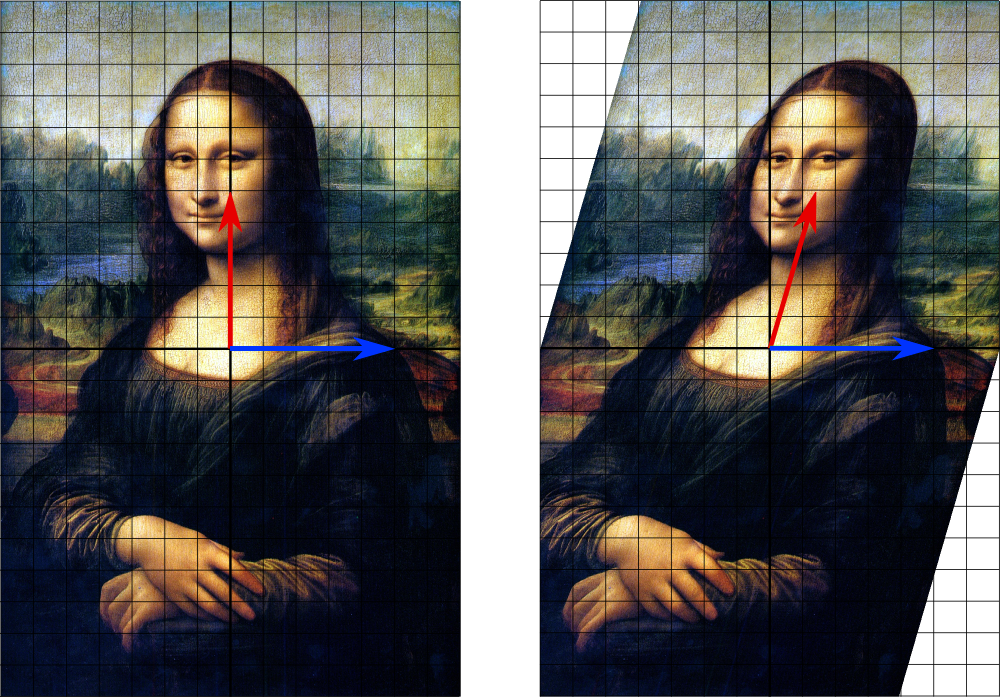

In [47]:
from IPython.display import Image
 
Image('https://upload.wikimedia.org/wikipedia/commons/3/3c/Mona_Lisa_eigenvector_grid.png')

In [48]:
eig_vals, eig_vecs = np.linalg.eig(covarance_metrix)

In [49]:
eig_vecs

array([[ 0.50575387,  0.02661901,  0.846005  , -0.16654481, -0.00654364],
       [ 0.44546722,  0.36019681, -0.11912824,  0.79997777,  0.13289562],
       [ 0.39101865, -0.68763577, -0.21460251, -0.03507502,  0.571819  ],
       [ 0.42480476,  0.55220868, -0.38292854, -0.57454218,  0.19461115],
       [-0.46088752,  0.30293944,  0.27820048,  0.03113546,  0.78577698]])

In [50]:
eig_vals

array([4.0929583 , 0.84084316, 0.07767828, 0.28779591, 0.2562799 ])

In [51]:
# 1차원으로 축소

eig_vals[0] / sum(eig_vals)

0.7367324937048955

결과 확인을 통해 1차원 데이터로 축소를 하더라도 원본데이터의 약 74% 정도에 해당하는 정보를 유지할 수 있다는 것을 확인할 수 있다. 손실율 26% 정도 발생.

In [52]:
project_x = x_std.dot(eig_vecs.T[0])/np.linalg.norm(eig_vecs.T[0])

In [53]:
project_x

array([-2.20867791,  0.02226909,  1.83193662, -2.68737195,  3.08798593,
       -2.13363065, -0.361904  ,  2.65519569, -0.31462995,  0.10882713])

In [54]:
# 시각화

result = pd.DataFrame(project_x, columns=['human'])
result['y-axis']=0.0
result['label']=y

In [55]:
result.head()

,human,y-axis,label
0,-2.208678,0.0,skinny
1,0.022269,0.0,normal
2,1.831937,0.0,fat
3,-2.687372,0.0,skinny
4,3.087986,0.0,fat


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'RESULT')

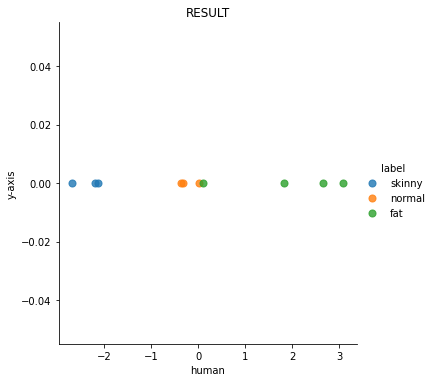

In [58]:
sns.lmplot(x='human', y='y-axis', data=result,
          fit_reg=False, scatter_kws={'s':50},
          hue = 'label')
plt.title('RESULT')